<a href="https://colab.research.google.com/github/BuckanovNikita/ML_MIET/blob/master/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

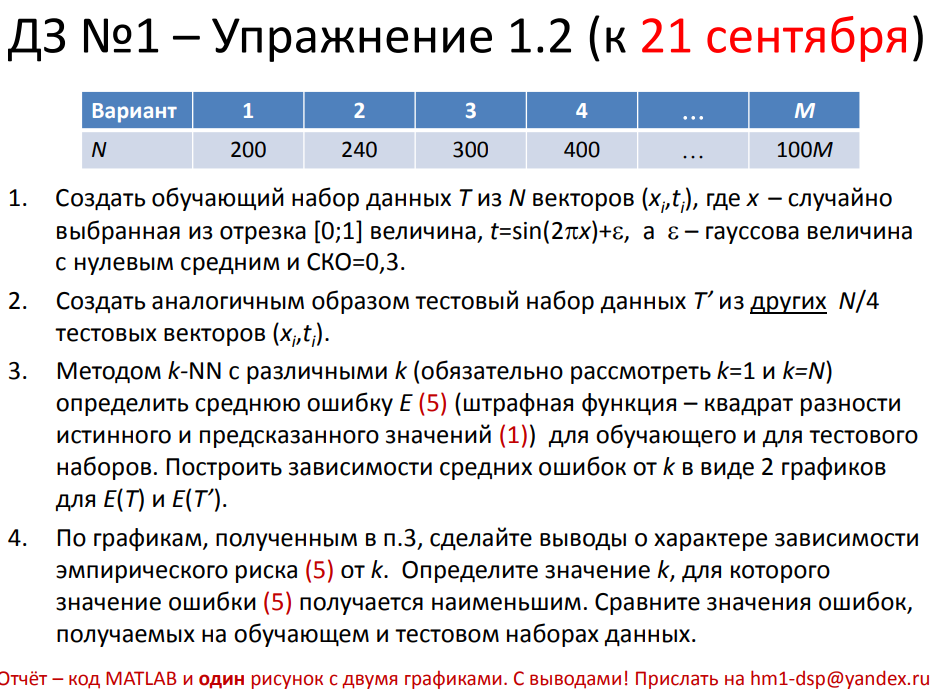

In [37]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline
N = 200
sigma = 0.3

In [2]:
x = np.sort(np.random.rand(N))
T = np.sin(2 * np.pi * x) + sigma * np.random.randn(N) 
x1 = np.sort(np.random.rand(N // 4))
T1 = np.sin(2 * np.pi * x1) + sigma * np.random.randn(N // 4) 

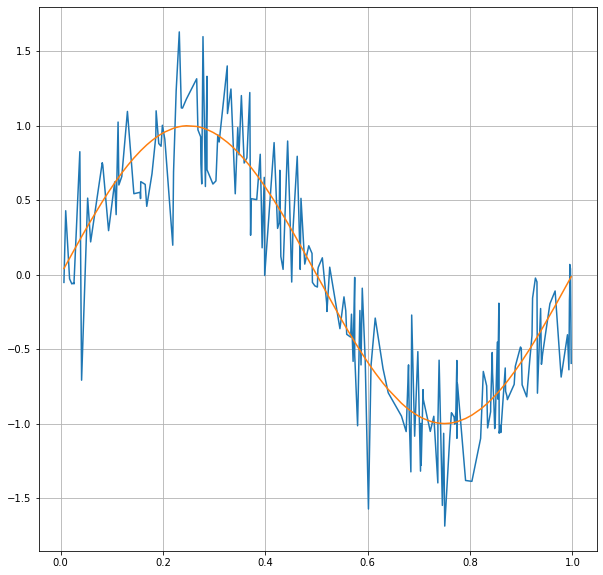

In [38]:
plt.figure(figsize=(10,10))
plt.plot(x, T)
plt.plot(x, np.sin(2 * np.pi * x))
plt.grid()

In [54]:
test_loss_list = []
train_loss_list = []
for n_neighbors in tqdm(range(1,201)):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(x.reshape(-1, 1), T)
    train_predicts = knn.predict(x.reshape(-1, 1))
    train_loss = ((train_predicts - T)**2).mean()
    train_loss_list.append(train_loss)

    test_predicts = knn.predict(x1.reshape(-1, 1))
    test_loss = ((test_predicts - T1)**2).mean()
    test_loss_list.append(test_loss)

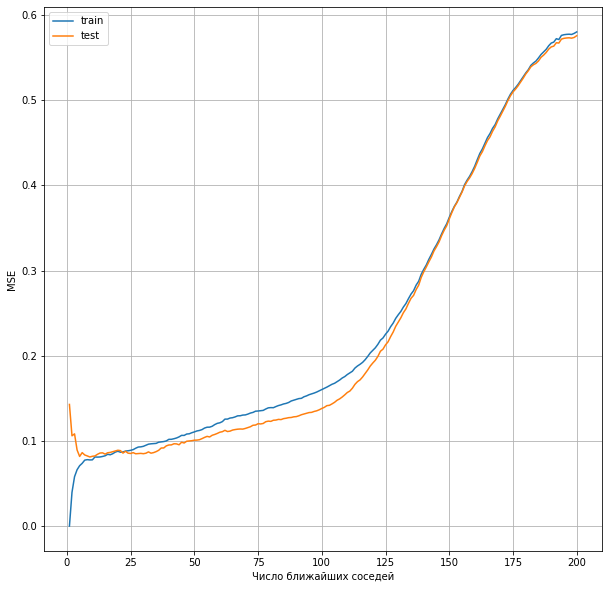

In [58]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 201), train_loss_list)
plt.plot(range(1, 201), test_loss_list)
plt.xlabel('Число ближайших соседей')
plt.ylabel('MSE')
plt.grid()
plt.legend(['train', 'test'])

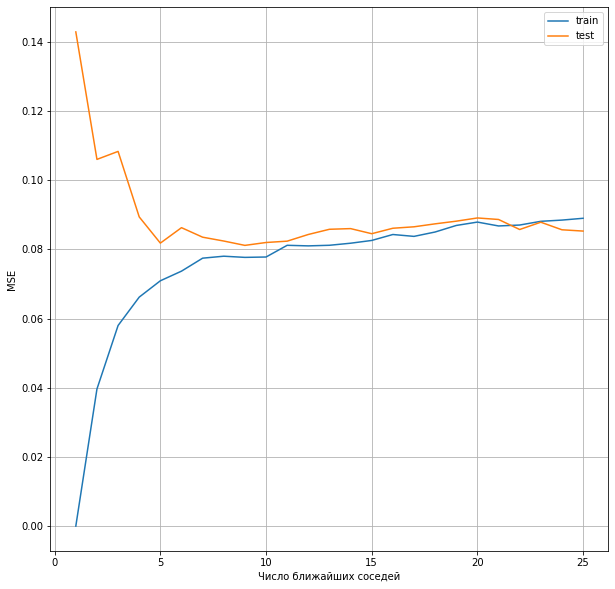

In [57]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 26), train_loss_list[:25])
plt.plot(range(1, 26), test_loss_list[:25])
plt.xlabel('Число ближайших соседей')
plt.ylabel('MSE')
plt.grid()
plt.legend(['train', 'test'])

# Выводы
Наименьшая ошибка на тестовом наборе достигается при числе ближайших соседей равном 10.  
**Train-MSE** = 0.006534004545506706  
**Test-MSE** = 0.003395529891479407 

При числе соседей N > 25 наступает переобучение. Ошибка на обоих наборах данных перестает уменьшаться, и достигает максимума при N равном числу обучающих примеров. Алгоритм при этом предсказывает среднее по всей обучающей выборке для любого входного значения.
